## Table of Contents
---



---

### TASKS

1. predicting stage (SVM, Decision Trees, novel model)
2. determining if there is a correlation with the disease and any other characstic (SVM, Decision Trees, novel model)
3. determining whether or not there is any genetic ties (neural networks, novel model) (add this in)
4. determine what type of disease is?
5. Target the same dataset as the related works. 

#### Walter
- Neural Networks (parameter tuning + model + stats + feature reduction) EOW5
- statistics/metrics (p-value, t-value, AUC) EOW7

#### Kris
- Decision Trees (parameter tuning + model + stats + feature reduction) EOW5
- discussion EOW7
- conclusion EOW7
- updates to PPT EOW8 (Jamie will help)

#### Thad
- SVM (parameter tuning + model + stats + feature reduction) EOW5
- rewrite of other papers EOW7
- how this affects the community EOW7
- tie back to other papers EOW7

#### Jamie 
- intro EOW4
- explaining data points EOW4
- data manipulation (all data related tasks) (reduction method) (reach if needed) EOW3
- enhance pre-processing (feature correlations)
- visualizations of ML Models (TBD if we have time) very novel EOW
- application build EOW8
- create new ML model EOW5
- just see if we can find antoher dataset
- create a repo EOW3
- one (minimum) paper for baseline (Walter/Thad will find 2-3 each) EOD Thursday 



## Primary Dataset
---
Cross, Simon S. "Dataset of Observed Features on Endoscopic 
Colorectal Biopsies from Normal Subjects and Patients with Chronic 
Inflammatory Bowel Disease (Crohn’s disease and Ulcerative 
Colitis)." Department of Pathology, University of Sheffield Medical 
School (1999): 1-15

### Libraries
---

In [1]:
# general libraries
import pandas as pd
import numpy as np
from collections import Counter
import itertools

In [2]:
# data cleaning libraries
from imblearn.over_sampling import SMOTE

In [3]:
# ML libraries
from sklearn.model_selection import train_test_split

In [4]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Data
---

### Pull in Data

***ENDSC Data***

In [5]:
# all cases
all_cases = pd.read_excel("../Data/dataset/ENDOSC_1.xls", sheet_name="All cases")
# cleaned cases
cleaned_cases = pd.read_excel("../Data/dataset/ENDOSC_1_2_2.xls", sheet_name="All IBD&normal")
cleaned_cases_og = cleaned_cases

### Data Cleaning

***Clean Diagnosis***:
Strip data and Upper Case

In [6]:
print(cleaned_cases['Confirmed diagnosis'].unique())
cleaned_cases['Confirmed diagnosis'] = [c.strip().upper() for c in cleaned_cases['Confirmed diagnosis']]
print( cleaned_cases['Confirmed diagnosis'].unique())

['UC' 'Crohns' 'Normal' 'Uc' 'Normal ' 'Crohns ']
['UC' 'CROHNS' 'NORMAL']


In [7]:
cleaned_cases['Observing pathologists diagnosis'].unique()

array(['Normal',
       'Chronic idiopathic IBD - highly suggestive of ulcerative colitis',
       'Inflammation - unclassified',
       'Chronic idiopathic IBD - indeterminate',
       "Chronic idiopathic IBD - highly suggestive of Crohn's disease",
       "Chronic idiopathic IBD - suggestive of Crohn's disease",
       'Chronic idiopathic IBD - suggestive of ulcerative colitis',
       'Infective type colitis', 'Other colitis Lymphocytic colitis',
       'Other colitis Melanosis coli'], dtype=object)

### Data Manipulation

***IBD Stages***: 
Since the stages of UC is determined by the severity of symptoms, the classes are manually added based on symptoms.

Use decision trees to determine 

Perhaps find a doctor who can provide some expertise into the stages? - check if this is possible (we would need multiple people to have statistically significance)

In [8]:
cleaned_cases.columns

Index(['Year', 'Lab No', 'Age', 'Sex', 'Active inflammation?',
       'Mucosal surface', 'Crypt architecture', 'Crypt profiles',
       'Increased lamina propria cellularity?',
       'Mild & superficial increase in lamina propria cellularity?',
       'Increased lymphoid aggregates in lamina propria?',
       'Patchy lamina propria cellularity?',
       'Marked & transmucosal increase in lamina propria cellularity',
       'Cryptitis extent', 'Cryptitis polymorphs', 'Crypt abscesses extent',
       'Crypt abscesses polymorphs', 'Lamina propria polymorphs',
       'Epithelial changes', 'Mucin depletion', 'Intraepithelial lymphocytes',
       'Subepithelial collagen', 'Lamina propria granulomas',
       'Submucosal granulomas', 'Basal histiocytic cells',
       'Confirmed diagnosis', 'Method of confirmation',
       'Initial pathologists diagnosis', 'Observing pathologists diagnosis'],
      dtype='object')

<h2>Train Test Split</h2>
Cross and coworkers randomly shuffled the dataset and split the first 540 cases as the train set and the lasts 269 cases as the test set.


In [9]:
X = cleaned_cases.drop('Confirmed diagnosis',axis=1)
y = cleaned_cases['Confirmed diagnosis']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=269, random_state=123)
print(f'Train set has {X_train.shape[0]} rows and test set has {X_test.shape[0]} rows')

Train set has 540 rows and test set has 269 rows


<h2>Class Imbalance</h2>
The minority class of heatlhy was oversampled so that there were equal diseased as unhealthy classes

In [10]:
Counter(y_train)

Counter({'UC': 305, 'CROHNS': 117, 'NORMAL': 118})

***IBD Genetics Data***: While genetics data is not present, there are general genetics data that can be pulled in as supplementary for analysis

### Feature Reduction

<h3>EDA</h3>
Each column in the dataset is a symptom.  SOme of the symptoms are rankings.  When the column for Subepithelial collagen is 1 it means that the patient had that symptom and when it is 0 it means the patient did not have that symptom.  

In [11]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,Year,Lab No,Age,Sex,Active inflammation?,Mucosal surface,Crypt architecture,Crypt profiles,Increased lamina propria cellularity?,Mild & superficial increase in lamina propria cellularity?,...,Mucin depletion,Intraepithelial lymphocytes,Subepithelial collagen,Lamina propria granulomas,Submucosal granulomas,Basal histiocytic cells,Method of confirmation,Initial pathologists diagnosis,Observing pathologists diagnosis,Confirmed diagnosis
66,96,4936,33.000000,0,0,0,0,7,0,0,...,0,0,0,0,0,0,Endoscopy,UC,Normal,UC
190,90,8052,43.000000,1,0,0,2,7,1,0,...,0,0,0,0,0,0,Endoscopy,"IBD indeterminate, quiescent",Chronic idiopathic IBD - indeterminate,CROHNS
84,90,334,42.665753,0,0,0,0,7,0,0,...,0,0,0,0,0,0,Endoscopy,Normal,Normal,CROHNS
242,90,11734,73.000000,0,1,0,0,7,1,0,...,0,0,0,0,1,0,Endoscopy,Crohns,Chronic idiopathic IBD - highly suggestive of ...,CROHNS
155,95,17143,31.000000,0,0,0,0,7,0,0,...,0,0,0,0,0,0,Endoscopy,"IBD indeterminate, quiscent",Normal,NORMAL


<h3>Supervised Learning</h3>

Get only the binary variables

In [12]:
binary_vars = X_train.columns[X_train.apply(lambda series: False if set(series)-{0,1} else True)]
binary_vars = list(set(binary_vars) - set(['Active inflammation?']))
binary_vars

['Basal histiocytic cells',
 'Patchy lamina propria cellularity?',
 'Subepithelial collagen',
 'Marked & transmucosal increase in lamina propria cellularity',
 'Increased lymphoid aggregates in lamina propria?',
 'Increased lamina propria cellularity?',
 'Mild & superficial increase in lamina propria cellularity?',
 'Lamina propria granulomas',
 'Submucosal granulomas',
 'Sex',
 'Intraepithelial lymphocytes']

Calculate the relative risk ratio of having IBD if patient has or doesnt have Patchy lamina propria cellularity

In [13]:
patchyVsIbd   = train.groupby(['Patchy lamina propria cellularity?','Confirmed diagnosis']).size()
patchySummary = X_train.groupby('Patchy lamina propria cellularity?').size()
print(patchyVsIbd)
print(patchySummary)

Patchy lamina propria cellularity?  Confirmed diagnosis
0                                   CROHNS                  82
                                    NORMAL                 114
                                    UC                     257
1                                   CROHNS                  35
                                    NORMAL                   4
                                    UC                      48
dtype: int64
Patchy lamina propria cellularity?
0    453
1     87
dtype: int64


What proportion of those with patchy lamina propria had Crohn's Disease?

In [14]:
proportions = patchyVsIbd/patchySummary
proportions

Patchy lamina propria cellularity?  Confirmed diagnosis
0                                   CROHNS                 0.181015
                                    NORMAL                 0.251656
                                    UC                     0.567329
1                                   CROHNS                 0.402299
                                    NORMAL                 0.045977
                                    UC                     0.551724
dtype: float64

How much more chance of getting Crohn's disease if you have patchy lamina propria cellularity VS if you dont have patch lamina prpria cellularity?

In [15]:
proportions.loc[1]/proportions.loc[0]

Confirmed diagnosis
CROHNS    2.222456
NORMAL    0.182698
UC        0.972494
dtype: float64

Observe above that the probabilit of getting Crohn's is twice as much if you have patchy lamina propria cellularity VS if you dont have patchy lamina.

Determine relative risk of Crohn's or UC for all the symptoms<br>
Calculation will require creating 3 tables:
<ol>
    <li>Symptom, Is Symptom Present, Confirmed Diagnosis, Count</li>
    <li>Symptom, Is Symptom Present, Count</li>
    <li>Symptom, Is Symptom Present, Confirmed Diagnosis, Proportion</li>
    <li>Symptom, Confirmed Diagnosis, Relative Risk (Final Table)</li>
</ol>

In [16]:
#1.Symptom, Is Symptom Present, Confirmed Diagnosis, Count
#Column, Value, Value for Diagnosis Column
binaryTrain = train[binary_vars+['Confirmed diagnosis']]
symptomDiagnosis = binaryTrain.reset_index().melt(id_vars=['index','Confirmed diagnosis'])
#Column, Value, Value for Diagnosis Column, Count
diseaseCountPerSymptom = symptomDiagnosis.groupby(['variable','value','Confirmed diagnosis']).size()
diseaseCountPerSymptom.head()

variable                 value  Confirmed diagnosis
Basal histiocytic cells  0      CROHNS                 113
                                NORMAL                 117
                                UC                     291
                         1      CROHNS                   4
                                NORMAL                   1
dtype: int64

In [17]:
#2.Symptom, Is Symptom Present, Count
countPerSymptom = symptomDiagnosis.groupby(['variable','value']).size()
countPerSymptom.head()

variable                                          value
Basal histiocytic cells                           0        521
                                                  1         19
Increased lamina propria cellularity?             0        216
                                                  1        324
Increased lymphoid aggregates in lamina propria?  0        453
dtype: int64

In [18]:
#3. Symptom, Is Symptom Present, Confirmed Diagnosis, Proportion
proportionIbdPerSymptom = diseaseCountPerSymptom/countPerSymptom
proportionIbdPerSymptom.head()

variable                 value  Confirmed diagnosis
Basal histiocytic cells  0      CROHNS                 0.216891
                                NORMAL                 0.224568
                                UC                     0.558541
                         1      CROHNS                 0.210526
                                NORMAL                 0.052632
dtype: float64

In [19]:
#4.Symptom, Confirmed Diagnosis, Relative Risk (Final Table)
propDf = proportionIbdPerSymptom.reset_index()
noSymptom  = propDf.loc[propDf['value']==0].drop('value',axis=1).set_index(['variable','Confirmed diagnosis'])
yesSymptom = propDf.loc[propDf['value']==1].drop('value',axis=1).set_index(['variable','Confirmed diagnosis'])

'''
Some symptoms such as Submucosal granulomas are only present in Crohn's pateints. this means there is no 
patient who has both submucosal granuloma and UC.  So the risk of having UC given u have submcuoal granulomas
is 0.  But currently in the yesSymptom df, the row Submucosal granulom and UC does not even exist.  So if that row 
is missing just add a row with 0
'''  
noSymptom = noSymptom.reset_index()
varDxCombos= list(itertools.product(set(noSymptom['variable']),set(noSymptom['Confirmed diagnosis'])))
allCombos  = pd.DataFrame(index=pd.MultiIndex.from_tuples(varDxCombos)) 
allCombos.index.names = ['variable','Confirmed diagnosis']
noSymptom  = noSymptom.set_index(['variable','Confirmed diagnosis'])
yesSymptom = pd.merge(yesSymptom, allCombos, left_index=True, right_index=True, how='outer').fillna({0:0})
yesSymptom.head()

0
variable                              Confirmed diagnosis          
Basal histiocytic cells               CROHNS               0.210526
                                      NORMAL               0.052632
                                      UC                   0.736842
Increased lamina propria cellularity? CROHNS               0.225309
                                      NORMAL               0.046296

Out of all the people that had Increased lamina propria cellularity, what percent of them had Crohn's disase?<br>
In below table see that 22.5% of patients with Increased lamina propria cellularity had Crohn's disease.

Out of all the people that did NOT have Increase lamina propria cellularity, how many had Crohn's disease?

In [20]:
noSymptom = pd.merge(noSymptom, allCombos, left_index=True, right_index=True, how='outer').fillna({0:0})
noSymptom.head()

0
variable                              Confirmed diagnosis          
Basal histiocytic cells               CROHNS               0.216891
                                      NORMAL               0.224568
                                      UC                   0.558541
Increased lamina propria cellularity? CROHNS               0.203704
                                      NORMAL               0.476852

You have two people, one with increased lamina propria cellularity and the other one without increased lamina propria cellularity.  How much more likely is the first person to have Crohn's disease compared to the second?

You have two people, one with increased lamina propria cellularity and the other one without increased lamina propria cellularity.  How much more likely is the first person to have Crohn's disease compared to the second?

In [21]:
relativeRiskIbd = (yesSymptom/noSymptom).reset_index()
relativeRiskIbd.head()

,variable,Confirmed diagnosis,0
0,Basal histiocytic cells,CROHNS,0.970657
1,Basal histiocytic cells,NORMAL,0.234368
2,Basal histiocytic cells,UC,1.319226
3,Increased lamina propria cellularity?,CROHNS,1.106061
4,Increased lamina propria cellularity?,NORMAL,0.097087


[Text(0.5, 1.0, 'Normal')]

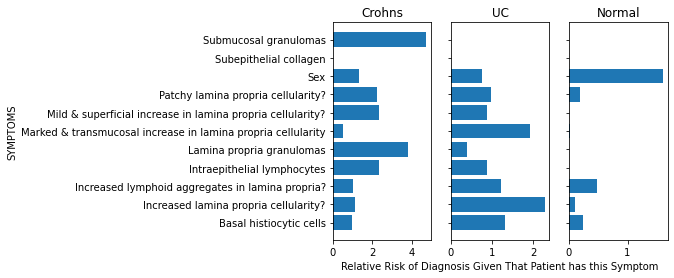

In [22]:
fig,ax = plt.subplots(nrows=1,ncols=3, sharey=True)
crohns = relativeRiskIbd[relativeRiskIbd['Confirmed diagnosis']=='CROHNS']
uc     = relativeRiskIbd[relativeRiskIbd['Confirmed diagnosis']=='UC']
normal = relativeRiskIbd[relativeRiskIbd['Confirmed diagnosis']=='NORMAL']
ax[0].barh(crohns['variable'],crohns[0])
ax[0].set(title='Crohns',
         ylabel='SYMPTOMS')
ax[1].barh(uc['variable'],uc[0])
ax[1].set(title='UC',xlabel='Relative Risk of Diagnosis Given That Patient has this Symptom',)
ax[2].barh(normal['variable'],normal[0])
ax[2].set(title='Normal')

For unsupervised EDA, The objective is to find multiple symptoms that are all 1 for the same patients and are all 0 for other patients.  

<ol>
    <li>First, manually calculate the risk ratio between Symptom A and Symptom B</li>
    <li>Next, create a cross tab where the row is Symptom A, the column is Symptom B and the cell value is the risk ratio of Symptom B / Symptom A</li>
    <li>Finally, find the groups of symptoms that have highest risk ratios for one another.  If 3 columns have high relative risk ratios, consider keeping only one of those columns and dropping the other 2</li>
</ol>

<h4>Risk Ratio</h4>
What is the risk of getting "Increased lamina propria cellularity" if you do have "Lamina propria granulomas" versus the risk of getting "Increased lamina propria cellularity" if you do not have "Lamina propria granulomas"?<br><br>

If two symptoms are both positive in 1000 patients.  And in another 1000 patients the two symptoms are negative.  This would indicate correlation between those 2 symptoms.

In [23]:
exposure = 'Lamina propria granulomas'
disease  = 'Increased lamina propria cellularity?'
risks = X_train.groupby([exposure,disease]
               ).size()/X_train.groupby([exposure]).size()
risks = risks.reset_index()
riskGivenNoExposure = risks.loc[(risks[exposure] == 0)&
                              (risks[disease] == 1),0].values[0]
riskGivenExposure   = risks.loc[(risks[exposure] == 1)&
                              (risks[disease] == 1),0].values[0]
riskGivenExposure/riskGivenNoExposure

1.5591715976331362

Get the cross tab of every symptom with every other symptom

In [24]:
def multicolumn_crosstab(df,cols):
    cols=sorted(cols)
    dummies = pd.get_dummies(df[cols])
    dfWithDummies = pd.concat([df,dummies],axis=1)
    dfWithDummies = dfWithDummies.reset_index()
    dfMelt = dfWithDummies.melt(id_vars=np.concatenate([np.array(['index']),dummies.columns.values]),
                      value_vars=cols)
    dfMelt = dfMelt.drop('index',axis=1)
    levelGroup = dfMelt.groupby(['variable','value'])
    crosstab = levelGroup.sum()
    countPerLevel = levelGroup.size()
    crossTabProp = crosstab.divide(countPerLevel,axis=0)
    return crossTabProp

In [25]:
ct = multicolumn_crosstab(X_train.astype(str),binary_vars)

In the below cross tab, the value in the second row, and in the fourth column (Incerased Lamina propria cellularity_1) is the number 0.894737.  This means that 89% of the patients (in the train set) had both Basal histocytic cells and Increased lamina propria cellularity.  Notice how this number 89% adds up tihe the 10.5263 % on the left of it.  That 10% number is the proportion of patients that had basal histocytic cells but did NOT have icnreased lamina propria cellularity.

In [26]:
ct

Basal histiocytic cells_0  \
variable                                           value                              
Basal histiocytic cells                            0                       1.000000   
                                                   1                       0.000000   
Increased lamina propria cellularity?              0                       0.990741   
                                                   1                       0.947531   
Increased lymphoid aggregates in lamina propria?   0                       0.964680   
                                                   1                       0.965517   
Intraepithelial lymphocytes                        0                       0.964419   
                                                   1                       1.000000   
Lamina propria granulomas                          0                       0.965844   
                                                   1                       0.923077   
Marked & transmucosal increase in lamina propri... 0                       0.971795   
                                                   1                       0.946667   
Mild & superficial increase in lamina propria c... 0                       0.964684   
                                                   1                       1.000000   
Patchy lamina propria cellularity?                 0                       0.971302   
                                                   1                       0.931034   
Sex                                                0                       0.953237   
                                                   1                       0.977099   
Subepithelial collagen                             0                       0.964815   
Submucosal granulomas                              0                       0.964552   
                                                   1                       1.000000   

                                                          Basal histiocytic cells_1  \
variable                                           value                              
Basal histiocytic cells                            0                       0.000000   
                                                   1                       1.000000   
Increased lamina propria cellularity?              0                       0.009259   
                                                   1                       0.052469   
Increased lymphoid aggregates in lamina propria?   0                       0.035320   
                                                   1                       0.034483   
Intraepithelial lymphocytes                        0                       0.035581   
                                                   1                       0.000000   
Lamina propria granulomas                          0                       0.034156   
                                                   1                       0.076923   
Marked & transmucosal increase in lamina propri... 0                       0.028205   
                                                   1                       0.053333   
Mild & superficial increase in lamina propria c... 0                       0.035316   
                                                   1                       0.000000   
Patchy lamina propria cellularity?                 0                       0.028698   
                                                   1                       0.068966   
Sex                                                0                       0.046763   
                                                   1                       0.022901   
Subepithelial collagen                             0                       0.035185   
Submucosal granulomas                              0                       0.035448   
                                                   1                       0.000000   

                                                      

Which feature is most correlated with the other features? <br><br>
Observe that "Increased lamina propria cellularity" and "Active Inflammation" are the columns that is most correlated with the other symptoms.

noExposureDf: Get all the risks of getting Symptom B given that you dont have symptom A.<br>
exposureDf:   Get all the risks of getting Symptom B given that you do have symptom A.

In [27]:
crossTab     = ct.reset_index()
noExposureDf = crossTab.loc[crossTab['value']=='0']
exposureDf   = crossTab.loc[crossTab['value']=='1']

Divide all the risk-given-exposure/ risk-given-no-exposure to get the relative risk for every symptom pair

In [28]:
noExposureDf = noExposureDf.set_index('variable').drop('value',axis=1)
exposureDf   = exposureDf.set_index('variable').drop('value',axis=1)
relativeRisks= exposureDf/noExposureDf
relativeRisks.head()

,Basal histiocytic cells_0,Basal histiocytic cells_1,Increased lamina propria cellularity?_0,Increased lamina propria cellularity?_1,Increased lymphoid aggregates in lamina propria?_0,Increased lymphoid aggregates in lamina propria?_1,Intraepithelial lymphocytes_0,Intraepithelial lymphocytes_1,Lamina propria granulomas_0,Lamina propria granulomas_1,...,Marked & transmucosal increase in lamina propria cellularity_1,Mild & superficial increase in lamina propria cellularity?_0,Mild & superficial increase in lamina propria cellularity?_1,Patchy lamina propria cellularity?_0,Patchy lamina propria cellularity?_1,Sex_0,Sex_1,Subepithelial collagen_0,Submucosal granulomas_0,Submucosal granulomas_1
variable,,,,,,,,,,,,,,,,,,,,,
Basal histiocytic cells,0.000000,inf,0.256272,1.518430,1.003974,0.979323,1.011650,0.000000,0.969703,2.285088,...,1.544848,1.003854,0.0,0.810167,2.031189,1.345184,0.642681,1.0,1.007737,0.000000
Increased lamina propria cellularity?,0.956386,5.666667,0.000000,inf,0.731481,inf,0.989147,3.333333,0.967442,8.000000,...,inf,0.993827,inf,0.731481,inf,1.186667,0.839080,1.0,0.987654,inf
Increased lymphoid aggregates in lamina propria?,1.000868,0.976293,0.000000,1.911392,0.000000,inf,0.999538,1.041379,1.029545,0.000000,...,0.000000,1.004435,0.0,1.202680,0.122515,1.059412,0.938180,1.0,1.008909,0.000000
Intraepithelial lymphocytes,1.036893,0.000000,0.413953,1.394984,0.993304,1.034884,0.000000,inf,0.852490,7.416667,...,1.202703,1.003759,0.0,0.792873,2.094118,0.644928,1.379845,1.0,1.007547,0.000000
Lamina propria granulomas,0.955720,2.252137,0.188551,1.559172,1.197727,0.000000,0.931919,8.107692,0.000000,inf,...,0.000000,1.003810,0.0,0.089687,6.486154,1.356305,0.628503,1.0,0.770693,121.615385


The relative risk from our risk matrix is the same as the one when we manually calculated it. 1.559171

In [29]:
relativeRisks.loc['Lamina propria granulomas','Increased lamina propria cellularity?_1' ]

1.5591715976331362

Replace infinity values or abnormally high Relative risks with 0

In [30]:
relativeRisks = relativeRisks.applymap(lambda cell:0 if cell>20 else cell)

Observe in heatmap below that Submucosal granulomas are highly correlated with lamina propria granulomas

<AxesSubplot:ylabel='variable'>

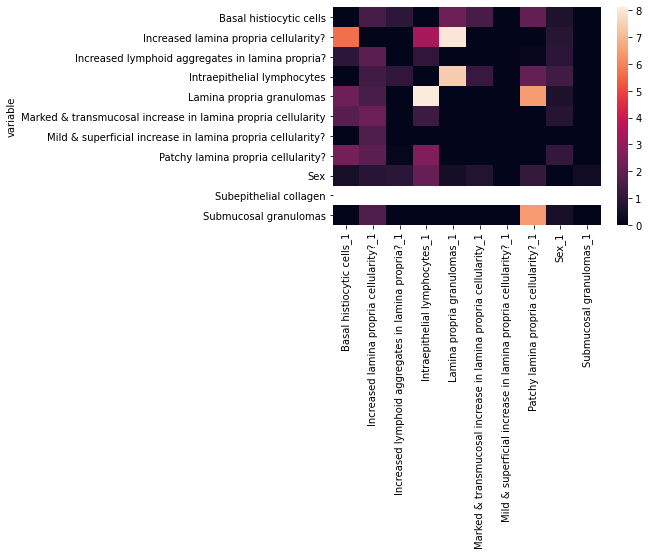

In [31]:
symptomPresent = [column for column in ct.columns if '1' in column]
sns.heatmap(relativeRisks[symptomPresent])

Out of the 453 patients that did not have patchy lamina propria cellularity none of those patients also had lamina propria granulomas.<br>
However, out of the 87 patients that had patchy laminap propria cellularity, 4 of those patients also had lamina propria granulomas.<br>
It looks like these 2 columns are correlated.

In [32]:
X_train.groupby(['Patchy lamina propria cellularity?','Submucosal granulomas']).size()

Patchy lamina propria cellularity?  Submucosal granulomas
0                                   0                        453
1                                   0                         83
                                    1                          4
dtype: int64

Out of the 453 patients that did not have patchy lamina propria cellularity only 1 of those patients also had lamina propria granulomas.<br>
However, out of the 87 patients that had patchy laminap propria cellularity, 12 of those patients also had lamina propria granulomas.<br>
It looks like these 2 columns are correlated.

In [33]:
X_train.groupby(['Patchy lamina propria cellularity?','Lamina propria granulomas']).size()

Patchy lamina propria cellularity?  Lamina propria granulomas
0                                   0                            452
                                    1                              1
1                                   0                             75
                                    1                             12
dtype: int64

You have two people, one with increased lamina propria cellularity and the other one without increased lamina propria cellularity.  How much more likely is the first person to have Crohn's disease compared to the second?

In [34]:
train.groupby(['Submucosal granulomas','Confirmed diagnosis']).size()

Submucosal granulomas  Confirmed diagnosis
0                      CROHNS                 113
                       NORMAL                 118
                       UC                     305
1                      CROHNS                   4
dtype: int64

### Model Assumptions

### ETL PipeLine

## Machine Learning Models
---

### Parameter Tuning

### Creation of novel ML Models

### Running Models

## Results/Discussion
---

### Results

### Statistics

### Visualizations

### Discussion

### Conclusions